<a href="https://colab.research.google.com/github/Ankit4371/Machine-Learning-Notebooks/blob/main/Optimized_CNN_Model_on_Fashion_MNIST/Optimized_CNN_Model_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top   
1: Trouser   
2: Pullover   
3: Dress  
4: Coat  
5: Sandal  
6: Shirt  
7: Sneaker  
8: Bag  
9: Ankle boot  

Installing Libraries

In [126]:
!pip install keras-tuner

In [127]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

### Loading Data

In [128]:
fashion_mnist = keras.datasets.fashion_mnist

Preparing Data

In [129]:
(train_images,train_labels),(test_images,test_labes) = fashion_mnist.load_data()

In [130]:
orig_img= test_images

In [131]:
train_images.shape

(60000, 28, 28)

In [132]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot' ]

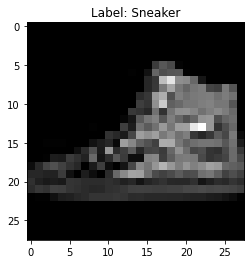

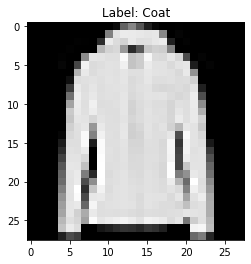

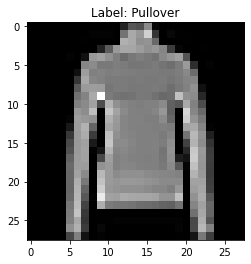

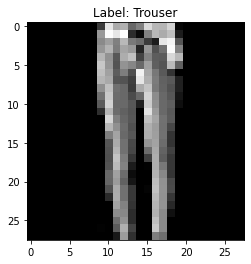

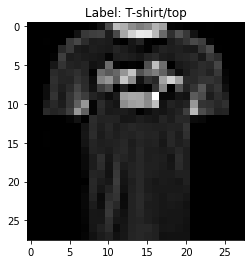

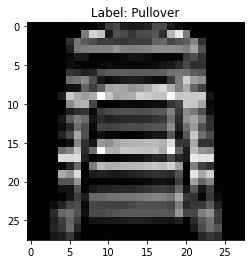

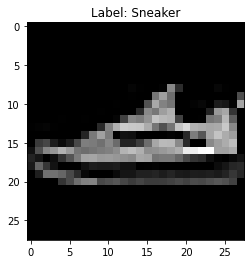

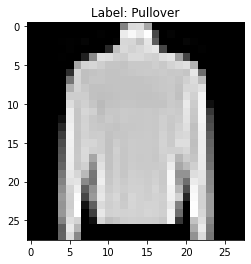

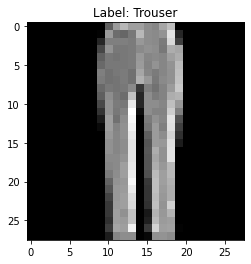

In [133]:

for i in range(1,10):
  index = random.randrange(60000)
  plt.imshow(train_images[index],cmap='gray')
  plt.title('Label: %s'% classes[train_labels[index]])
  plt.show()

In [134]:
train_images= train_images/255.0
test_images = test_images/255.0

In [135]:
train_images[0].shape

(28, 28)

In [136]:

train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)


## Finding best parameters

In [137]:
def build_model(hp):
  model = keras.Sequential([
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter',min_value = 32,max_value = 128,step = 16),
            kernel_size = hp.Choice('conv_1_kernel',values = [3,5]),
            activation = 'relu',
            input_shape = (28,28,1)
          ),
          keras.layers.Conv2D(
            filters = hp.Int('conv_2_filter',min_value = 32,max_value = 64,step = 16),
            kernel_size = hp.Choice('conv_2_kernel',values = [3,5]),
            activation = 'relu',
          ),
          keras.layers.Flatten(),
          keras.layers.Dense(
              units = hp.Int('dense_1_units',min_value = 32,max_value = 128, step = 16),
              activation='relu'
          ),
          keras.layers.Dense(10,activation='softmax')


  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values = [1e-1,1e-2,1e-3]))
  ,loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'])

  return model

In [138]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [139]:
tuner_search = RandomSearch(build_model,
                            objective = 'val_accuracy',
                            max_trials =5,
                            directory = 'output',
                            project_name = 'fashion_mnist')

INFO:tensorflow:Reloading Oracle from existing project output/fashion_mnist/oracle.json
INFO:tensorflow:Reloading Tuner from output/fashion_mnist/tuner0.json


In [140]:
tuner_search.search(train_images,train_labels,epochs =3,validation_split = 0.1)

INFO:tensorflow:Oracle triggered exit


In [141]:
model = tuner_search.get_best_models(num_models=1)[0]

### Training Model

In [142]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 112)       2912      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        134448    
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               2150512   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1130      
Total params: 2,289,002
Trainable params: 2,289,002
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(train_images,train_labels,epochs = 10,validation_split = 0.1,initial_epoch= 3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1709 - accuracy: 0.9354 - val_loss: 0.2469 - val_accuracy: 0.9132
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1314 - accuracy: 0.9483 - val_loss: 0.2994 - val_accuracy: 0.9068
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1039 - accuracy: 0.9609 - val_loss: 0.2858 - val_accuracy: 0.9047
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0829 - accuracy: 0.9686 - val_loss: 0.3209 - val_accuracy: 0.9087
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0662 - accuracy: 0.9751 - val_loss: 0.3627 - val_accuracy: 0.9065
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0490 - accuracy: 0.9811 - val_loss: 0.4418 - val_accuracy: 0.9027
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0407 - accuracy: 0.9851 - val_loss: 0.5168 - val_accuracy

### Predictions

In [144]:
test_predict = model.predict(test_images)

In [145]:
y = np.argmax(test_predict, axis=1)
y

array([9, 2, 1, ..., 8, 1, 5])

In [146]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y,test_labes)

0.904

In [147]:
confusion_matrix(y,test_labes)

array([[865,   4,  15,  25,   3,   0, 114,   0,   4,   1],
       [  0, 975,   1,   1,   0,   0,   0,   0,   0,   0],
       [ 29,   0, 920,  14, 130,   0, 123,   0,   7,   0],
       [ 13,  14,   7, 898,  21,   0,  16,   0,   1,   0],
       [  6,   3,  23,  25, 812,   0,  62,   0,   1,   0],
       [  0,   0,   0,   0,   0, 977,   0,   6,   1,   5],
       [ 80,   2,  33,  35,  32,   0, 672,   0,   3,   0],
       [  0,   0,   0,   0,   0,  15,   0, 986,   1,  41],
       [  7,   2,   1,   2,   2,   1,  13,   0, 982,   0],
       [  0,   0,   0,   0,   0,   7,   0,   8,   0, 953]])

### Checking Predictions

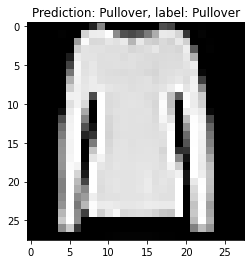

In [148]:
index = random.randrange(10000)
plt.title('Prediction: %s, label: %s' % (classes[y[index]], classes[test_labes[index]]))
plt.imshow(orig_img[index], cmap='gray')
plt.show()

### Error Analysis

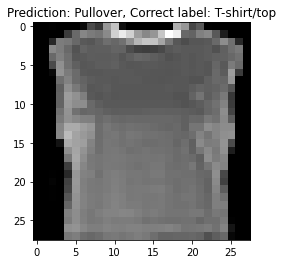

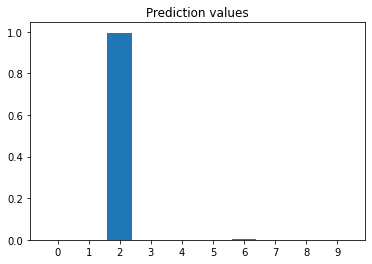

In [149]:
for i in range(10000):
    index = random.randrange(10000)
    if y[index] != test_labes[index]:
        break

plt.imshow(orig_img[index], cmap='gray')
plt.title('Prediction: %s, Correct label: %s' % (classes[y[index]], classes[test_labes[index]]))
plt.show()

plt.bar(range(10), test_predict[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()